In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import pdist, squareform
import plotly.offline as py
from tqdm import tqdm

# for dataset visibility
pd.set_option('display.max_columns', None)

# Set a seed for reproducibility
np.random.seed(42)
df_merged_clusterB = pd.read_hdf('../ds/cleaned/reduced_for_clustering.h5')
df_merged_clusterB.head()

,date,state,city_or_county,latitude,longitude,congressional_district,participant_age_group1,participant_gender1,avg_age_participants,n_participants_child,n_participants_teen,n_females,n_killed,n_injured,n_arrested,n_unharmed,incident_characteristics1,povertyPercentage,party,candidatevotes,totalvotes,ratio_killed,death_level,percentage_injured,unharmed_ratio,density_incident_state,males_to_females_ratio
0,2014-01-01,Arkansas,Pine Bluff,34.2291,-91.9779,4,Adult 18+,Male,26,0,0,0,0,1,0,1,Shot - Wounded/Injured,16.8,REPUBLICAN,110789.0,206131.0,0.0,No deaths,58.789954,2.345189,0.136149,2.0
1,2014-01-01,California,Bakersfield,35.3229,-119.0380,23,Adult 18+,Male,28,0,0,0,0,2,0,0,Shot - Wounded/Injured,14.5,REPUBLICAN,100317.0,134043.0,0.0,No deaths,45.310907,2.345189,0.639968,2.0
2,2014-01-01,Iowa,Iowa City,41.6611,-91.5302,2,Adult 18+,Female,35,0,0,2,0,1,0,1,other,10.1,DEMOCRAT,143431.0,273329.0,0.0,No deaths,71.662763,2.345189,0.096973,0.0
3,2014-01-01,New York,Brooklyn,40.6505,-73.9573,9,Adult 18+,Male,29,0,0,1,0,3,0,0,Shot - Wounded/Injured,13.4,DEMOCRAT,70997.0,101606.0,0.0,No deaths,70.237122,2.345189,0.534650,2.0
4,2014-01-01,Colorado,Grand Junction,39.0496,-108.5250,3,Adult 18+,Male,47,0,0,0,1,0,0,0,"Shot - Dead (murder, accidental, suicide)",10.2,REPUBLICAN,163011.0,281141.0,1.0,All deaths,43.229167,2.345189,0.097775,1.0


# Density-based clustering

DBSCAN: start from data distribution, count #points close to each point, like a circle and overlap. Define a core points: es a point that is close to at least n points (defined by user), randomly pick a core point, assign it to a cluster. Others core points close to the 1st cluster are added (cuz the circle overlap them), go on... then add non-core point if just is close to a core point


In [13]:
df_merged_clusterB['avg_incident_density_per_district'] = df_merged_clusterB.groupby('congressional_district')['density_incident_state'].transform('mean')
df_merged_clusterB.head()

,date,state,city_or_county,latitude,longitude,congressional_district,participant_age_group1,participant_gender1,avg_age_participants,n_participants_child,n_participants_teen,n_females,n_killed,n_injured,n_arrested,n_unharmed,incident_characteristics1,povertyPercentage,party,candidatevotes,totalvotes,ratio_killed,death_level,percentage_injured,unharmed_ratio,density_incident_state,males_to_females_ratio,avg_incident_density_per_district
0,2014-01-01,Arkansas,Pine Bluff,34.2291,-91.9779,4,Adult 18+,Male,26,0,0,0,0,1,0,1,Shot - Wounded/Injured,16.8,REPUBLICAN,110789.0,206131.0,0.0,No deaths,58.789954,2.345189,0.136149,2.0,0.332950
1,2014-01-01,California,Bakersfield,35.3229,-119.0380,23,Adult 18+,Male,28,0,0,0,0,2,0,0,Shot - Wounded/Injured,14.5,REPUBLICAN,100317.0,134043.0,0.0,No deaths,45.310907,2.345189,0.639968,2.0,0.593119
2,2014-01-01,Iowa,Iowa City,41.6611,-91.5302,2,Adult 18+,Female,35,0,0,2,0,1,0,1,other,10.1,DEMOCRAT,143431.0,273329.0,0.0,No deaths,71.662763,2.345189,0.096973,0.0,0.316859
3,2014-01-01,New York,Brooklyn,40.6505,-73.9573,9,Adult 18+,Male,29,0,0,1,0,3,0,0,Shot - Wounded/Injured,13.4,DEMOCRAT,70997.0,101606.0,0.0,No deaths,70.237122,2.345189,0.534650,2.0,0.416183
4,2014-01-01,Colorado,Grand Junction,39.0496,-108.5250,3,Adult 18+,Male,47,0,0,0,1,0,0,0,"Shot - Dead (murder, accidental, suicide)",10.2,REPUBLICAN,163011.0,281141.0,1.0,All deaths,43.229167,2.345189,0.097775,1.0,0.271355


In [14]:
stato_con_massima_povertà = df_merged_clusterB.loc[df_merged_clusterB['povertyPercentage'].idxmax()]

# Stampa le informazioni sullo stato con la più alta povertyPercentage
print("Stato con la più alta povertyPercentage:")
print(stato_con_massima_povertà[['state', 'povertyPercentage']])


Stato con la più alta povertyPercentage:
state                Mississippi
povertyPercentage           20.8
Name: 16, dtype: object


Poorest state is not anymore the New Mexico beacuse we have dropped past years, so let's analyse the Mississippi

In [15]:
col_clustering_dbscan = ['avg_age_participants', 'percentage_injured','avg_incident_density_per_district']
df_for_dbscan = df_merged_clusterB[col_clustering_dbscan]
df_mississippi =  df_merged_clusterB[df_merged_clusterB['state'] == 'Mississippi']
df_mississippi_clustering = df_mississippi[col_clustering_dbscan]

# Standardizzazione dei dati
scaler = StandardScaler()
df_mississippi_scaled = scaler.fit_transform(df_mississippi_clustering)

/tmp/ipykernel_499768/2855713833.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



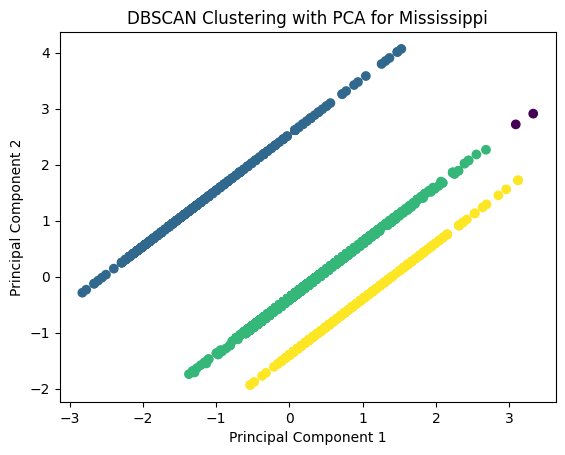

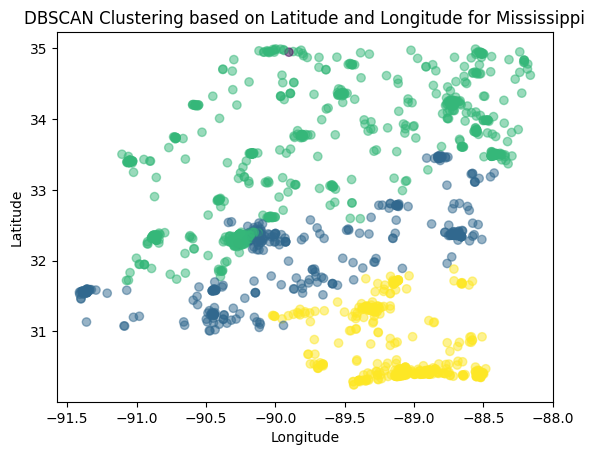

Numero totale di cluster: 4
Cluster 0: 401 elementi
Caratteristiche del cluster:
                                date    latitude   longitude  \
count                            401  401.000000  401.000000   
mean   2016-04-05 04:07:46.832917760   32.146711  -89.822265   
min              2014-01-01 00:00:00   31.006300  -91.412000   
25%              2015-03-08 00:00:00   31.591700  -90.219500   
50%              2016-05-19 00:00:00   32.297000  -90.107600   
75%              2017-05-12 00:00:00   32.381800  -88.828000   
max              2018-03-31 00:00:00   33.492700  -88.421700   
std                              NaN    0.583387    0.831160   

       congressional_district  avg_age_participants  n_participants_child  \
count                   401.0            401.000000            401.000000   
mean                      3.0             31.087282              0.052369   
min                       3.0              2.000000              0.000000   
25%                       3.0     

In [16]:
# priciapal component analysis
from sklearn.decomposition import PCA


#dbscan
eps = 0.6  # Distanza massima tra due campioni per essere considerati nello stesso vicinato
min_samples = 5  # Numero minimo di campioni in un vicinato per essere considerati un cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_mississippi['cluster_labels'] = dbscan.fit_predict(df_mississippi_scaled)

#nice values eps = 0.6, min_samples = 5

#pca
pca=PCA(n_components=3)
mississippi_pca = pca.fit_transform(df_mississippi_scaled)
#plt.scatter(mississippi_pca[:,0], mississippi_pca[:,1])
plt.scatter(mississippi_pca[:, 0], mississippi_pca[:, 1], c=df_mississippi['cluster_labels'], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('DBSCAN Clustering with PCA for Mississippi')
plt.show()

# Visualizza i risultati del clustering in base a latitudine e longitudine
plt.scatter(df_mississippi['longitude'], df_mississippi['latitude'], c=df_mississippi['cluster_labels'], cmap='viridis', marker='o', alpha=0.5)
plt.title('DBSCAN Clustering based on Latitude and Longitude for Mississippi')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()



# Calcola il numero totale di cluster
n_clusters = len(set(df_mississippi['cluster_labels'])) - (1 if -1 in df_mississippi['cluster_labels'] else 0)
print(f"Numero totale di cluster: {n_clusters}")

# Stampa informazioni sui singoli cluster
for cluster_label in set(df_mississippi['cluster_labels']):
    if cluster_label == -1:
        print(f"Cluster NOISE (outlier): {len(df_mississippi[df_mississippi['cluster_labels'] == cluster_label])} elementi")
    else:
        cluster_data = df_mississippi[df_mississippi['cluster_labels'] == cluster_label]
        print(f"Cluster {cluster_label}: {len(cluster_data)} elementi")
        print(f"Caratteristiche del cluster:")
        print(cluster_data.describe())
        print("\n")
#calcola il numero totale di cluster, identifica gli elementi etichettati come rumore (cluster -1) e fornisce informazioni statistiche sui singoli cluster        

4 cluster, numerati da 0 a 2, e un cluster di rumore (outlier) etichettato con -1. 

Cluster 0
Numero di elementi nel cluster: 401
Caratteristiche principali:
Media della latitudine: 32.15, longitudine: -89.82
Età minima dei partecipanti: 1, età massima: 83
Numero medio di partecipanti feriti: 0.46
Numero medio di partecipanti uccisi: 0.50
Poverty Percentage medio: 19.70
Densità degli incidenti nello stato medio: 0.15
Rapporto tra maschi e femmine medio: 1.57
Media dell'età dei partecipanti: 29.29

Cluster 1
Numero di elementi nel cluster: 951
Caratteristiche principali:
Media della latitudine: 33.17, longitudine: -89.83
Età minima dei partecipanti: 2, età massima: 77
Numero medio di partecipanti feriti: 0.47
Numero medio di partecipanti uccisi: 0.52
Poverty Percentage medio: 19.62
Densità degli incidenti nello stato medio: 0.15
Rapporto tra maschi e femmine medio: 1.59
Media dell'età dei partecipanti: 28.47

Cluster 2
Numero di elementi nel cluster: 462
Caratteristiche principali:
Media della latitudine: 30.77, longitudine: -89.10
Età minima dei partecipanti: 3, età massima: 76
Numero medio di partecipanti feriti: 0.32
Numero medio di partecipanti uccisi: 0.36
Poverty Percentage medio: 19.71
Densità degli incidenti nello stato medio: 0.15
Rapporto tra maschi e femmine medio: 1.61
Media dell'età dei partecipanti: 29.82

Cluster NOISE (Outlier)
Numero di elementi nel cluster: 2

Cluster Principali (0, 1, 2):
1) Numero di Elementi: I cluster principali contengono rispettivamente 401, 951 e 462 elementi. Sono gruppi di incidenti che condividono caratteristiche simili rispetto alle variabili considerate.
2) Posizione Geografica:

Cluster 0: Media della latitudine 32.15, longitudine -89.82.
Cluster 1: Media della latitudine 33.17, longitudine -89.83.
Cluster 2: Media della latitudine 30.77, longitudine -89.10.

3) Caratteristiche Principali:
Età dei Partecipanti, Numero di Partecipanti Feriti e Uccisi, Poverty Percentage, Densità degli Incidenti e Rapporto tra Maschi e Femmine.

Cluster di Rumore (Outlier, etichettato come -1):
Numero di Elementi: Il cluster di rumore contiene 2 elementi. Questi sono considerati atipici rispetto agli altri cluster.

Posizione Geografica e Caratteristiche:
Il cluster di rumore potrebbe contenere osservazioni che non sono sufficientemente vicine a nessun cluster principale secondo i criteri specificati (eps e min_samples).
Questo cluster può contenere incidenti che non si adattano bene a nessun gruppo o potrebbero essere considerati "anomali" rispetto alle altre osservazioni.

# PYCLUSTERING

In [17]:
import numpy as np

print("Versione di NumPy:", np.__version__)

Versione di NumPy: 1.23.5


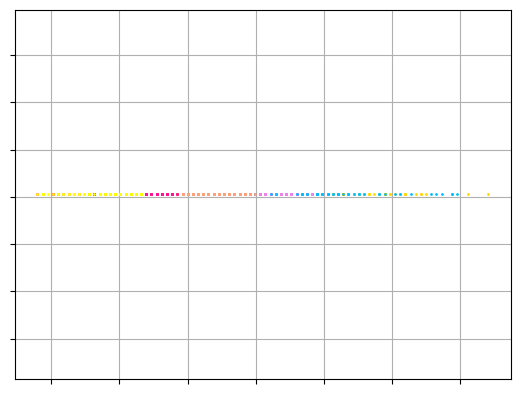

Numero totale di cluster: 10
Cluster 0: 182 elementi
Caratteristiche del cluster:
                                date    latitude   longitude  \
count                            182  182.000000  182.000000   
mean   2016-09-15 03:33:37.582417664   32.151200  -89.833234   
min              2014-01-01 00:00:00   31.009300  -91.412000   
25%              2016-02-15 12:00:00   31.596375  -90.369400   
50%              2016-10-20 00:00:00   32.297250  -90.116500   
75%              2017-06-15 12:00:00   32.381800  -88.810775   
max              2018-03-31 00:00:00   33.474800  -88.421700   
std                              NaN    0.575274    0.854814   

       congressional_district  avg_age_participants  n_participants_child  \
count                   182.0            182.000000            182.000000   
mean                      3.0             20.648352              0.109890   
min                       3.0              2.000000              0.000000   
25%                       3.0    

In [18]:
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.mbsas import mbsas
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

# Parametri per MBSAS
threshold = 0.6  # soglia di distanza
min_cluster_size = 5  # numero minimo di elementi in un cluster
sample_size = 10  # numero di campioni da utilizzare per la creazione di cluster iniziale

# Inizializza i cluster usando K-Means++
initial_centers = kmeans_plusplus_initializer(df_mississippi_scaled, sample_size).initialize()

# Crea un'istanza di MBSAS
mbsas_instance = mbsas(df_mississippi_scaled, len(initial_centers), threshold, min_cluster_size)
mbsas_instance.process()

# Ottieni i risultati del clustering
clusters = mbsas_instance.get_clusters()

# Trova i punti di rumore (punti non assegnati a nessun cluster)
noise_indices = [point_index for cluster in clusters for point_index in cluster]
all_points = set(range(len(df_mississippi_scaled)))
noise_indices = list(all_points - set(noise_indices))


# Visualizza i cluster utilizzando PCA
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_mississippi_scaled[:, 0:2], markersize=2)
visualizer.append_cluster(noise_indices, df_mississippi_scaled[:, 0:2], marker='x', markersize=5)
visualizer.show()

# Stampa informazioni sui singoli cluster
print(f"Numero totale di cluster: {len(clusters)}")

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {len(cluster)} elementi")
    print(f"Caratteristiche del cluster:")
    print(df_mississippi.iloc[cluster].describe())
    print("\n")

# Stampa informazioni sul rumore
print(f"Cluster NOISE (outlier): {len(noise_indices)} elementi")

In [19]:
df_merged_clusterB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131618 entries, 0 to 134578
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               131618 non-null  datetime64[ns]
 1   state                              131618 non-null  object        
 2   city_or_county                     131618 non-null  object        
 3   latitude                           131618 non-null  float64       
 4   longitude                          131618 non-null  float64       
 5   congressional_district             131618 non-null  int64         
 6   participant_age_group1             131618 non-null  category      
 7   participant_gender1                131618 non-null  category      
 8   avg_age_participants               131618 non-null  int64         
 9   n_participants_child               131618 non-null  int64         
 10  n_participants_teen      

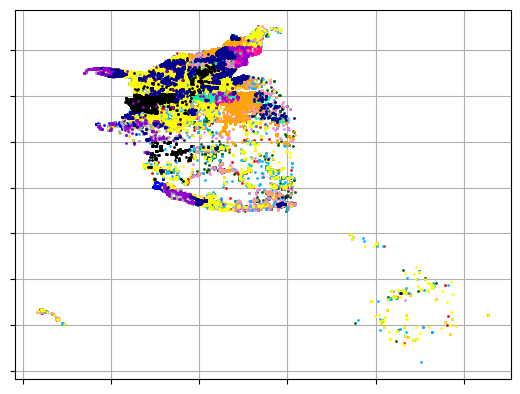

Numero totale di cluster: 15
Cluster 0: 13255 elementi
Caratteristiche del cluster:
       percentage_injured  avg_incident_density_per_district  \
count        13255.000000                       13255.000000   
mean            50.526133                           0.329927   
std              6.422317                           0.038458   
min             34.816248                           0.271355   
25%             45.695364                           0.316859   
50%             52.611219                           0.317587   
75%             55.471192                           0.344431   
max             62.133431                           0.518333   

       congressional_district  unharmed_ratio  males_to_females_ratio  \
count            13255.000000    13255.000000            13255.000000   
mean                 3.807167        7.148300                2.252458   
std                  2.565178        2.948095                0.545706   
min                  1.000000        2.345189  

In [20]:
from pyclustering.cluster import cluster_visualizer, mbsas
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.mbsas import mbsas as MBSAS

# Seleziona colonne rilevanti
col_clustering_mbsas = ['percentage_injured', 'avg_incident_density_per_district', 'congressional_district', 'unharmed_ratio', 'males_to_females_ratio', 'povertyPercentage', 'avg_age_participants', 'latitude', 'longitude']

# Crea un DataFrame con le colonne selezionate
df_for_mbsas = df_merged_clusterB[col_clustering_mbsas]

# Standardizzazione dei dati
scaler = StandardScaler()
df_for_mbsas_scaled = scaler.fit_transform(df_for_mbsas)

# Parametri per MBSAS
threshold = 0.6  # soglia di distanza
min_cluster_size = 10  # numero minimo di elementi in un cluster
sample_size = 15 # numero di campioni da utilizzare per la creazione di cluster iniziale

# Inizializza i cluster usando K-Means++
initial_centers = kmeans_plusplus_initializer(df_for_mbsas_scaled[:, -2:], sample_size).initialize()  # Usiamo solo le colonne 'latitude' e 'longitude'

# Crea un'istanza di MBSAS
mbsas_instance = MBSAS(df_for_mbsas_scaled[:, :-2], len(initial_centers), threshold, min_cluster_size)  # Escludi le colonne 'latitude' e 'longitude'
mbsas_instance.process()

# Ottieni i risultati del clustering
clusters = mbsas_instance.get_clusters()

# Visualizza i cluster utilizzando PCA
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_for_mbsas_scaled[:, -2:], markersize=2)  # Usa solo le colonne 'latitude' e 'longitude' per la visualizzazione
visualizer.show()

# Stampa informazioni sui singoli cluster
print(f"Numero totale di cluster: {len(clusters)}")

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {len(cluster)} elementi")
    print(f"Caratteristiche del cluster:")
    print(df_for_mbsas.iloc[cluster].describe())
    print("\n")


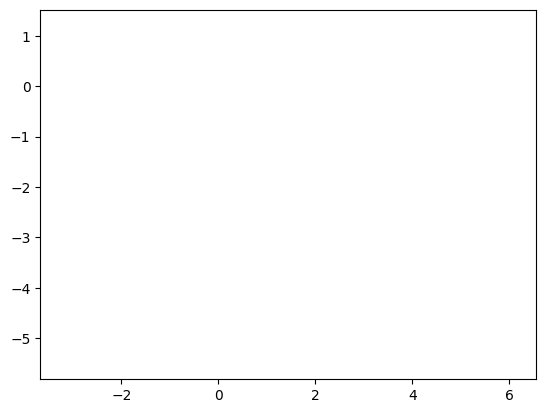

Numero totale di cluster: 10
Cluster 0: 10591 elementi
Caratteristiche del cluster:
       percentage_injured  avg_incident_density_per_district  \
count        10591.000000                       10591.000000   
mean            53.201313                           0.315631   
std              5.343898                           0.024755   
min             34.816248                           0.271355   
25%             49.906191                           0.316859   
50%             53.783342                           0.316859   
75%             57.850857                           0.332950   
max             59.958290                           0.518333   

       congressional_district  unharmed_ratio  males_to_females_ratio  \
count            10591.000000    10591.000000            10591.000000   
mean                 2.836371        6.514827                1.564237   
std                  1.603214        3.041887                0.727322   
min                  1.000000        2.345189  

In [21]:
from pyclustering.cluster import cluster_visualizer, mbsas
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.mbsas import mbsas as MBSAS
import numpy as np
import matplotlib.pyplot as plt

# Seleziona colonne rilevanti
col_clustering_mbsas = ['percentage_injured', 'avg_incident_density_per_district', 'congressional_district', 'unharmed_ratio', 'males_to_females_ratio', 'povertyPercentage', 'avg_age_participants', 'latitude', 'longitude']

# Crea un DataFrame con le colonne selezionate
df_for_mbsas = df_merged_clusterB[col_clustering_mbsas]

# Standardizzazione dei dati
scaler = StandardScaler()
df_for_mbsas_scaled = scaler.fit_transform(df_for_mbsas)

# Parametri per MBSAS
threshold = 0.6  # soglia di distanza
min_cluster_size = 5  # numero minimo di elementi in un cluster
sample_size = 10  # numero di campioni da utilizzare per la creazione di cluster iniziale

# Inizializza i cluster usando K-Means++
initial_centers = kmeans_plusplus_initializer(df_for_mbsas_scaled[:, -2:], sample_size).initialize()  # Usiamo solo le colonne 'latitude' e 'longitude'

# Crea un'istanza di MBSAS
mbsas_instance = MBSAS(df_for_mbsas_scaled[:, :-2], len(initial_centers), threshold, min_cluster_size)  # Escludi le colonne 'latitude' e 'longitude'
mbsas_instance.process()

# Ottieni i risultati del clustering
clusters = mbsas_instance.get_clusters()

# Visualizza i cluster utilizzando PCA
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_for_mbsas_scaled[:, -2:], markersize=2)  # Usa solo le colonne 'latitude' e 'longitude' per la visualizzazione

# Inverti gli assi utilizzando Matplotlib
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Specifica l'intervallo degli assi
plt.xlim(df_for_mbsas_scaled[:, -2].min(), df_for_mbsas_scaled[:, -2].max())
plt.ylim(df_for_mbsas_scaled[:, -1].min(), df_for_mbsas_scaled[:, -1].max())

plt.show()

# Stampa informazioni sui singoli cluster
print(f"Numero totale di cluster: {len(clusters)}")

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {len(cluster)} elementi")
    print(f"Caratteristiche del cluster:")
    print(df_for_mbsas.iloc[cluster].describe())
    print("\n")



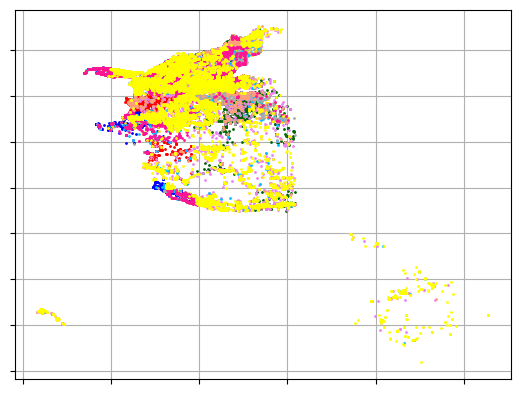

Numero totale di cluster: 10
Cluster 0: 10591 elementi
Caratteristiche del cluster:
       percentage_injured  avg_incident_density_per_district  \
count        10591.000000                       10591.000000   
mean            53.201313                           0.315631   
std              5.343898                           0.024755   
min             34.816248                           0.271355   
25%             49.906191                           0.316859   
50%             53.783342                           0.316859   
75%             57.850857                           0.332950   
max             59.958290                           0.518333   

       congressional_district  unharmed_ratio  males_to_females_ratio  \
count            10591.000000    10591.000000            10591.000000   
mean                 2.836371        6.514827                1.564237   
std                  1.603214        3.041887                0.727322   
min                  1.000000        2.345189  

In [22]:
from pyclustering.cluster import cluster_visualizer, mbsas
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.mbsas import mbsas as MBSAS

# Seleziona colonne rilevanti
col_clustering_mbsas = ['percentage_injured', 'avg_incident_density_per_district', 'congressional_district', 'unharmed_ratio', 'males_to_females_ratio', 'povertyPercentage', 'avg_age_participants', 'latitude', 'longitude']

# Crea un DataFrame con le colonne selezionate
df_for_mbsas = df_merged_clusterB[col_clustering_mbsas]

# Standardizzazione dei dati
scaler = StandardScaler()
df_for_mbsas_scaled = scaler.fit_transform(df_for_mbsas)

# Parametri per MBSAS
threshold = 0.6  # soglia di distanza
min_cluster_size = 5  # numero minimo di elementi in un cluster
sample_size = 10  # numero di campioni da utilizzare per la creazione di cluster iniziale

# Inizializza i cluster usando K-Means++
initial_centers = kmeans_plusplus_initializer(df_for_mbsas_scaled[:, -2:], sample_size).initialize()  # Usiamo solo le colonne 'latitude' e 'longitude'

# Crea un'istanza di MBSAS
mbsas_instance = MBSAS(df_for_mbsas_scaled[:, :-2], len(initial_centers), threshold, min_cluster_size)  # Escludi le colonne 'latitude' e 'longitude'
mbsas_instance.process()

# Ottieni i risultati del clustering
clusters = mbsas_instance.get_clusters()

# Visualizza i cluster utilizzando PCA
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_for_mbsas_scaled[:, -2:], markersize=2)  # Usa solo le colonne 'latitude' e 'longitude' per la visualizzazione
visualizer.show()

# Stampa informazioni sui singoli cluster
print(f"Numero totale di cluster: {len(clusters)}")

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {len(cluster)} elementi")
    print(f"Caratteristiche del cluster:")
    print(df_for_mbsas.iloc[cluster].describe())
    print("\n")


In [23]:
'''
from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.mbsas import mbsas
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.preprocessing import StandardScaler

# Seleziona colonne rilevanti
col_clustering_mbsas = ['latitude', 'longitude', 'min_age_participants', 'percentage_injured', 'avg_incident_density_per_district', 'congressional_district']

# Crea un DataFrame con le colonne selezionate
df_for_mbsas = df_merged_clusterB[col_clustering_mbsas]

# Standardizzazione dei dati
scaler = StandardScaler()
df_for_mbsas_scaled = scaler.fit_transform(df_for_mbsas)

# Parametri per MBSAS
threshold = 0.6  # soglia di distanza
min_cluster_size = 5  # numero minimo di elementi in un cluster
sample_size = 10  # numero di campioni da utilizzare per la creazione di cluster iniziale

# Inizializza i cluster usando K-Means++
initial_centers = kmeans_plusplus_initializer(df_for_mbsas_scaled, sample_size).initialize()

# Crea un'istanza di MBSAS
mbsas_instance = mbsas(data=df_for_mbsas_scaled, amount_clusters=len(initial_centers), threshold=threshold, ccore=False)
mbsas_instance.process()

# Ottieni i risultati del clustering
clusters = mbsas_instance.get_clusters()

# Visualizza i cluster utilizzando PCA
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_for_mbsas_scaled[:, :2], markersize=2)  # Seleziona solo le colonne latitudine e longitudine
visualizer.show()

# Stampa informazioni sui singoli cluster
print(f"Numero totale di cluster: {len(clusters)}")

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {len(cluster)} elementi")
    print(f"Caratteristiche del cluster:")
    print(df_for_mbsas.iloc[cluster].describe())
    print("\n")
'''

'\nfrom pyclustering.cluster import cluster_visualizer\nfrom pyclustering.cluster.mbsas import mbsas\nfrom pyclustering.cluster.center_initializer import kmeans_plusplus_initializer\nfrom sklearn.preprocessing import StandardScaler\n\n# Seleziona colonne rilevanti\ncol_clustering_mbsas = [\'latitude\', \'longitude\', \'min_age_participants\', \'percentage_injured\', \'avg_incident_density_per_district\', \'congressional_district\']\n\n# Crea un DataFrame con le colonne selezionate\ndf_for_mbsas = df_merged_clusterB[col_clustering_mbsas]\n\n# Standardizzazione dei dati\nscaler = StandardScaler()\ndf_for_mbsas_scaled = scaler.fit_transform(df_for_mbsas)\n\n# Parametri per MBSAS\nthreshold = 0.6  # soglia di distanza\nmin_cluster_size = 5  # numero minimo di elementi in un cluster\nsample_size = 10  # numero di campioni da utilizzare per la creazione di cluster iniziale\n\n# Inizializza i cluster usando K-Means++\ninitial_centers = kmeans_plusplus_initializer(df_for_mbsas_scaled, sample_s

using distance metric, work on numerical features we remove the categorical data

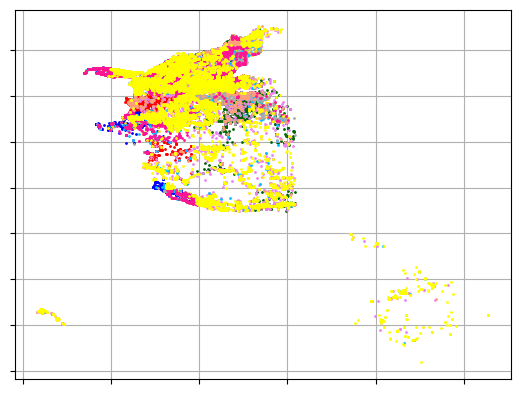

Numero totale di cluster: 10
Cluster 0: 10591 elementi
Caratteristiche del cluster:
       percentage_injured  avg_incident_density_per_district  \
count        10591.000000                       10591.000000   
mean            53.201313                           0.315631   
std              5.343898                           0.024755   
min             34.816248                           0.271355   
25%             49.906191                           0.316859   
50%             53.783342                           0.316859   
75%             57.850857                           0.332950   
max             59.958290                           0.518333   

       congressional_district  unharmed_ratio  males_to_females_ratio  \
count            10591.000000    10591.000000            10591.000000   
mean                 2.836371        6.514827                1.564237   
std                  1.603214        3.041887                0.727322   
min                  1.000000        2.345189  

In [24]:
from pyclustering.cluster import cluster_visualizer, mbsas
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from sklearn.preprocessing import StandardScaler
from pyclustering.cluster.mbsas import mbsas as MBSAS

# Seleziona colonne rilevanti
col_clustering_mbsas = ['percentage_injured', 'avg_incident_density_per_district', 'congressional_district', 'unharmed_ratio', 'males_to_females_ratio', 'povertyPercentage', 'avg_age_participants', 'latitude', 'longitude']

# Crea un DataFrame con le colonne selezionate
df_for_mbsas = df_merged_clusterB[col_clustering_mbsas]

# Standardizzazione dei dati
scaler = StandardScaler()
df_for_mbsas_scaled = scaler.fit_transform(df_for_mbsas)

# Parametri per MBSAS
threshold = 0.6  # soglia di distanza
min_cluster_size = 5  # numero minimo di elementi in un cluster
sample_size = 10  # numero di campioni da utilizzare per la creazione di cluster iniziale

# Inizializza i cluster usando K-Means++
initial_centers = kmeans_plusplus_initializer(df_for_mbsas_scaled[:, -2:], sample_size).initialize()  # Usiamo solo le colonne 'latitude' e 'longitude'

# Crea un'istanza di MBSAS
mbsas_instance = MBSAS(df_for_mbsas_scaled[:, :-2], len(initial_centers), threshold, min_cluster_size)  # Escludi le colonne 'latitude' e 'longitude'
mbsas_instance.process()

# Ottieni i risultati del clustering
clusters = mbsas_instance.get_clusters()

# Visualizza i cluster utilizzando PCA
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, df_for_mbsas_scaled[:, -2:], markersize=2)  # Usa solo le colonne 'latitude' e 'longitude' per la visualizzazione
visualizer.show()

# Stampa informazioni sui singoli cluster
print(f"Numero totale di cluster: {len(clusters)}")

for i, cluster in enumerate(clusters):
    print(f"Cluster {i}: {len(cluster)} elementi")
    print(f"Caratteristiche del cluster:")
    print(df_for_mbsas.iloc[cluster].describe())
    print("\n")


In [25]:
df_merged_clusterB.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131618 entries, 0 to 134578
Data columns (total 28 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   date                               131618 non-null  datetime64[ns]
 1   state                              131618 non-null  object        
 2   city_or_county                     131618 non-null  object        
 3   latitude                           131618 non-null  float64       
 4   longitude                          131618 non-null  float64       
 5   congressional_district             131618 non-null  int64         
 6   participant_age_group1             131618 non-null  category      
 7   participant_gender1                131618 non-null  category      
 8   avg_age_participants               131618 non-null  int64         
 9   n_participants_child               131618 non-null  int64         
 10  n_participants_teen      

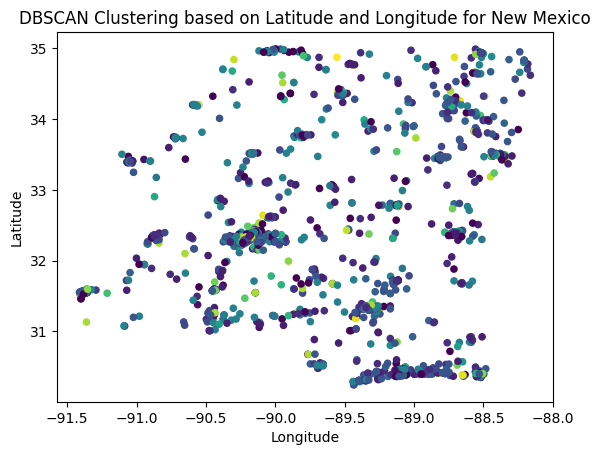

In [27]:
df_newMexico = df_merged_clusterB[df_merged_clusterB['state'] == 'Mississippi']

# columns for clustering
selected_columns = ['n_killed', 'n_injured', 'males_to_females_ratio', 'n_participants_teen', 'avg_age_participants']
Y = df_newMexico[selected_columns]

# Standardizza i dati Z-score
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)

# Applica DBSCAN
dbscan = DBSCAN(eps=1, min_samples=10)
dbscan.fit(Y_scaled)

# Visualizza il risultato del clustering su latitudine e longitudine
plt.scatter(df_newMexico['longitude'], df_newMexico['latitude'], c=dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering based on Latitude and Longitude for New Mexico')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Avoid the bias given by the range of the different attribute by normalization.

In [ ]:
# considering new mexico because has the greatest poverty percentage
df_mississ = df_merged_clusterB[df_merged_clusterB['state'] == 'Mississippi']
# columns for clustering
#selected_columns = ['density_incident_state', 'males_to_females_ratio','percentage_injured','min_age_participants','max_age_participants','n_participants_child','n_participants_teen', 'n_females', 'n_killed','n_injured','n_arrested','n_unharmed','n_participants', 'unharmed_ratio']
selected_columns = ['n_killed','n_injured','males_to_females_ratio','n_participants_teen','min_age_participants', 'percentage_injured','avg_incident_density_per_district']
Y = df_mississ[selected_columns]
# Standardizza i dati Z-score
scaler = StandardScaler()
scaler.fit(Y.values)

In [ ]:
Y.head()

In [ ]:
scaler.transform(Y.head().values)

In [ ]:
scaler.inverse_transform(scaler.transform(Y.head().values))

In [ ]:
dbscan = DBSCAN(eps=0.9, min_samples=10)
dbscan.fit(Y)

Output:
* **labels_**: Cluster labels for each point in the dataset. Noisy samples are given the label -1.

In [ ]:
dbscan.labels_[:6]

size of each cluster

In [ ]:
np.unique(dbscan.labels_, return_counts=True)

Cluster visualization in 2 dim

In [ ]:
#plt.scatter(Y['min_age_participants'], Y['n_participants'], c=dbscan.labels_, s=20)
#plt.tick_params(axis='both', which='major', labelsize=22)
#plt.show()

In [ ]:
# visualize the clusters according to latitude and longitude
plt.scatter(df_mississ['latitude'], df_mississ['longitude'], c=dbscan.labels_, cmap='viridis', s=20)
plt.title('DBSCAN Clustering based on Latitude and Longitude for New Mexico')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [ ]:
col = ['n_killed', 'n_injured', 'n_participants', 'males_to_females_ratio', 'n_participants_teen', 'min_age_participants','latitude','longitude']
df_state = df_merged_clusterB[df_merged_clusterB['state'] == 'New Mexico'][col]

# Standardizza i dati Z-score
scaler = StandardScaler()
state_df_scaled = scaler.fit_transform(df_state)

# Esegui DBSCAN
eps = 0.5  # Sostituisci con il valore appropriato
min_samples = 5  # Sostituisci con il valore appropriato
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
df_state['cluster'] = dbscan.fit_predict(state_df_scaled)

# Visualizza i risultati
plt.figure(figsize=(10, 6))
plt.scatter(state_df['n_killed'], state_df['n_injured'], c=state_df['cluster'], cmap='viridis', alpha=0.5)
plt.title('DBSCAN Clustering of Incidents in New Mexico')
plt.xlabel('Number of Killed')
plt.ylabel('Number of Injured')
plt.show()

In [ ]:
def run_dbscan_clustering(df, state, eps=0.2, min_samples=3):
    # Filtra il DataFrame per lo stato specificato
    state_df = df[df['state'] == state]

    # Seleziona le colonne rilevanti per il clustering
    #selected_columns = ['latitude', 'longitude','n_participants']
    selected_columns = ['n_participants', 'n_killed', 'n_injured']
    X = state_df[selected_columns]

    # Standardizza i dati Z-score
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Esegui DBSCAN
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    state_df['cluster'] = dbscan.fit_predict(X_scaled)

    # Analisi dei parametri di clustering
    n_clusters = len(set(state_df['cluster'])) - (1 if -1 in state_df['cluster'] else 0)
    print(f'Number of clusters: {n_clusters}')

    # Caratterizzazione e interpretazione dei cluster
    cluster_stats = state_df.groupby('cluster').agg({
        'latitude': 'mean',
        'longitude': 'mean',
        'n_killed': 'sum',
        'n_injured': 'sum',
        'n_participants': 'sum'
    })

    # Visualizzazione dei risultati
    for cluster_id, row in cluster_stats.iterrows():
        print(f'Cluster {cluster_id}:')
        print(f'  Centroid: ({row["n_killed"]}, {row["n_injured"]})')
        print(f'  Number of killed: {row["n_killed"]}')
        print(f'  Number of injured: {row["n_injured"]}')
        print(f'  Number of participants: {row["n_participants"]}')
        print('---')

    # Visualizzazione della distribuzione dei cluster sulla mappa (usa solo a scopo illustrativo)
    plt.scatter(state_df['latitude'], state_df['longitude'], c=state_df['cluster'], cmap='viridis')
    plt.title('DBSCAN Clustering')
    plt.xlabel('latitude')
    plt.ylabel('longitude')
    plt.show()

# Esempio di utilizzo
# run_dbscan_clustering(df_merged_clusterB, 'Illinois', eps=0.2, min_samples=5)

In [ ]:
run_dbscan_clustering(df_merged_clusterB, 'Illinois', eps=0.4, min_samples=7)